<a href="https://colab.research.google.com/github/Anshad-Aziz/technical-training/blob/main/DS_salary_prediction_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objects as go
%matplotlib inline

In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
df=pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
plt.style.use('seaborn-v0_8')

In [6]:
df_eda=pd.read_csv('ds_salaries.csv')

In [8]:
df_eda.max()

work_year                             2023
experience_level                        SE
employment_type                         PT
job_title             Staff Data Scientist
salary                            30400000
salary_currency                        USD
salary_in_usd                       450000
employee_residence                      VN
remote_ratio                           100
company_location                        VN
company_size                             S
dtype: object

In [9]:
import plotly.express as px
fig=px.pie(df_eda,title='company_size',names='company_size')
fig.show()

In [11]:
fig=px.pie(df_eda,title='company',names='work_year')
fig.show()

<Axes: xlabel='count', ylabel='job_title'>

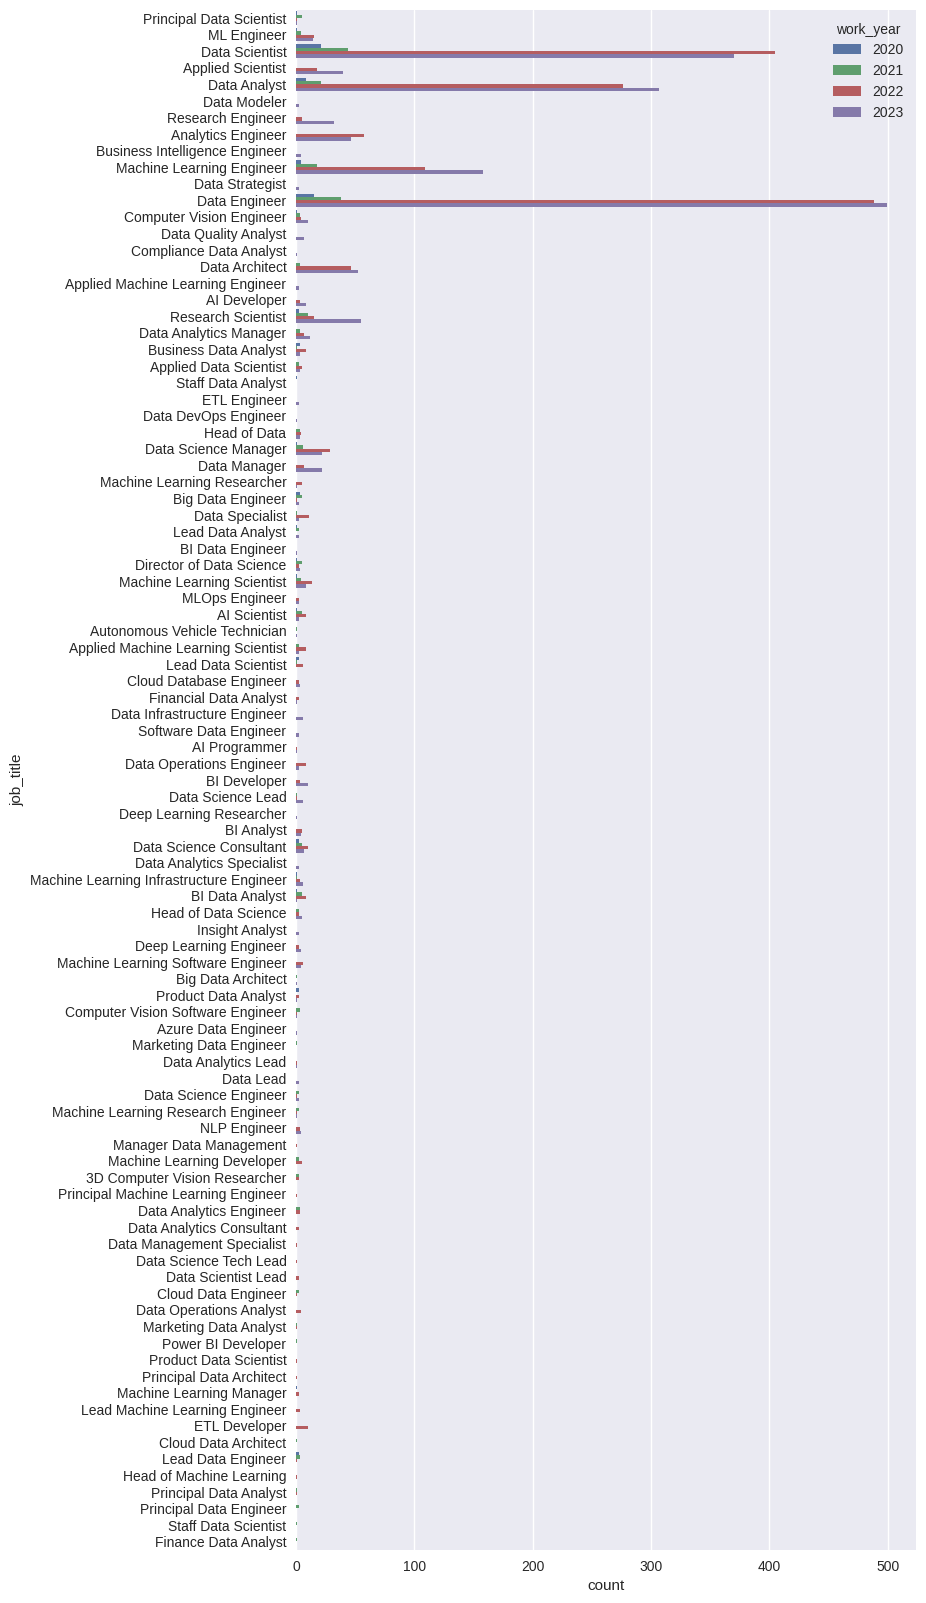

In [12]:
plt.figure(figsize=(8,20))
sns.countplot(data=df_eda,y='job_title',hue='work_year')

In [13]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 67.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=ad8cec3672b978dcdabd83fd45483b2d1e8395e944a23015dd394ecb35c1fdaf
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [14]:
import pycountry

def do_search(country_code):
  try:
    result=pycountry.countries.get(alpha_2=country_code)
  except Exception:
    return np.nan
  else:
    return result.name

df_eda['country']=df_eda['company_location'].apply(lambda country_code:do_search(country_code))
df_eda.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Spain
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,United States
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,United States
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Canada
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Canada


<Axes: xlabel='count', ylabel='country'>

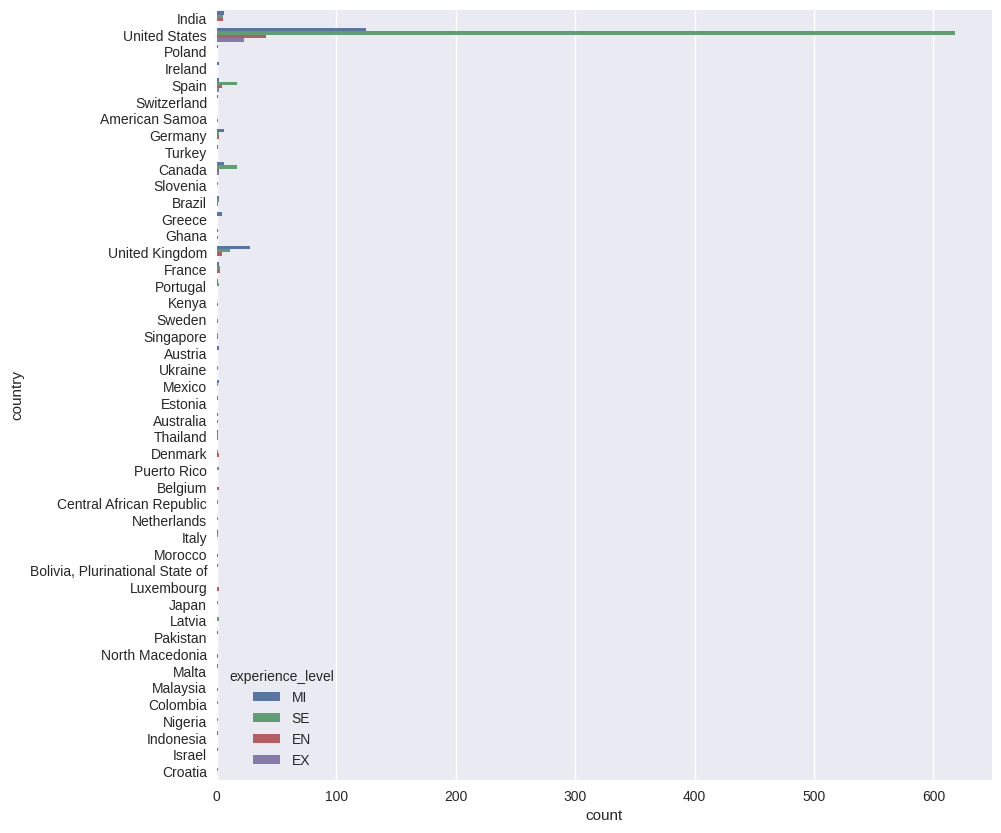

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_eda.sample(1000),y='country',hue='experience_level')

<Axes: xlabel='count', ylabel='country'>

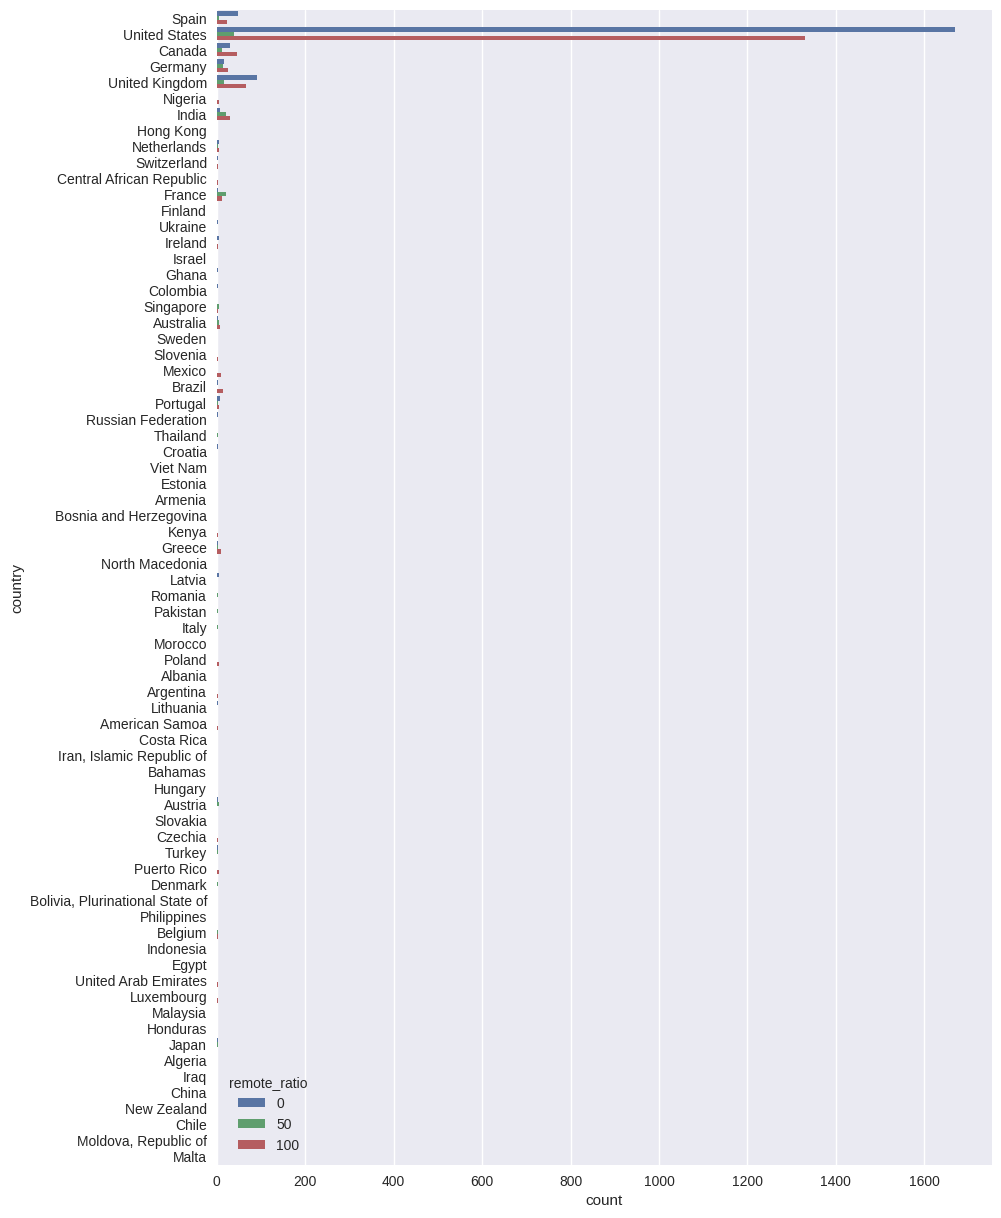

In [16]:
plt.figure(figsize=(10,15))
sns.countplot(data=df_eda,y='country',hue='remote_ratio')

<Axes: xlabel='experience_level', ylabel='count'>

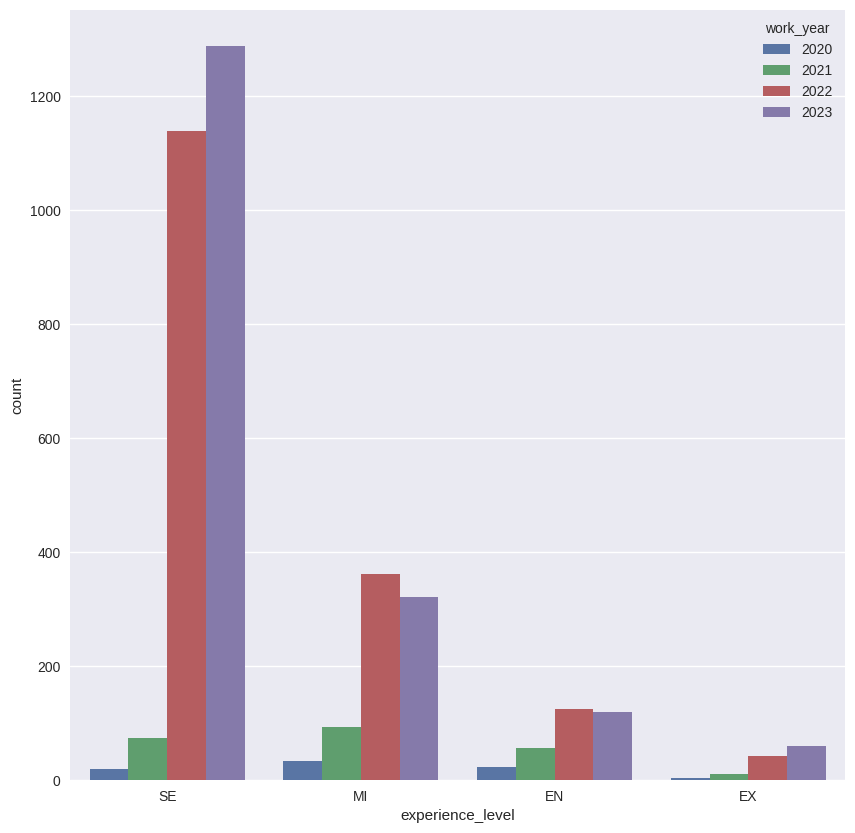

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_eda,x='experience_level',hue='work_year')

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
cols = ['experience_level', 'employment_type', 'job_title','salary_currency','employee_residence','company_location','company_size']
df[cols]=df[cols].apply(LabelEncoder().fit_transform)
X=df.drop(['salary_in_usd'],axis=1)
y=df['salary_in_usd']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           3755 non-null   int64
 1   experience_level    3755 non-null   int64
 2   employment_type     3755 non-null   int64
 3   job_title           3755 non-null   int64
 4   salary              3755 non-null   int64
 5   salary_currency     3755 non-null   int64
 6   salary_in_usd       3755 non-null   int64
 7   employee_residence  3755 non-null   int64
 8   remote_ratio        3755 non-null   int64
 9   company_location    3755 non-null   int64
 10  company_size        3755 non-null   int64
dtypes: int64(11)
memory usage: 322.8 KB


In [23]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,85847,26,100,25,0
1,2023,2,0,66,30000,19,30000,75,100,70,2
2,2023,2,0,66,25500,19,25500,75,100,70,2
3,2023,3,2,47,175000,19,175000,11,100,12,1
4,2023,3,2,47,120000,19,120000,11,100,12,1


In [24]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1),
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])
history=model.fit(X_train,y_train,epochs=100)

Epoch 1/100
94/94 [==============================] - 6s 3ms/step - loss: 125181.3984 - mae: 125181.3984
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 72291.3203 - mae: 72291.3203
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 57360.7344 - mae: 57360.7344
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 57671.7773 - mae: 57671.7773
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 59155.2266 - mae: 59155.2266
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 56651.8242 - mae: 56651.8242
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 56547.7070 - mae: 56547.7070
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 56460.9531 - mae: 56460.9531
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 56991.7852 - mae: 56991.7852
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 57130.

<Axes: >

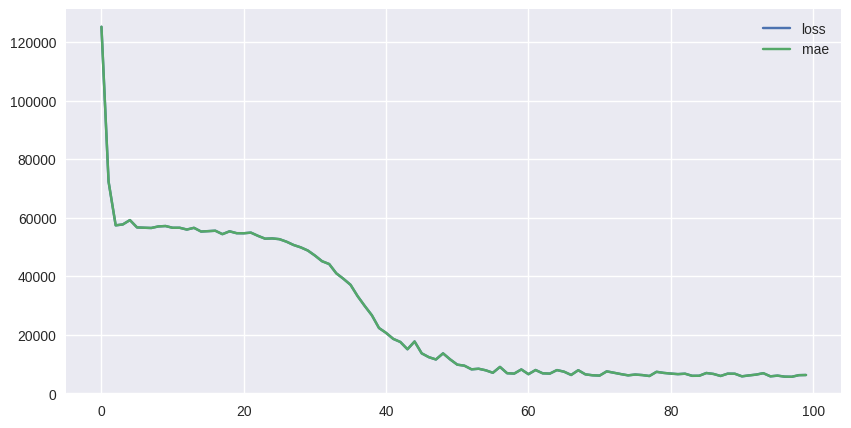

In [25]:
pd.DataFrame(history.history).plot(figsize=(10,5))

In [26]:
prediction=model.predict(X_test)

24/24 [==============================] - 0s 2ms/step


In [27]:
prediction=np.ravel(prediction)

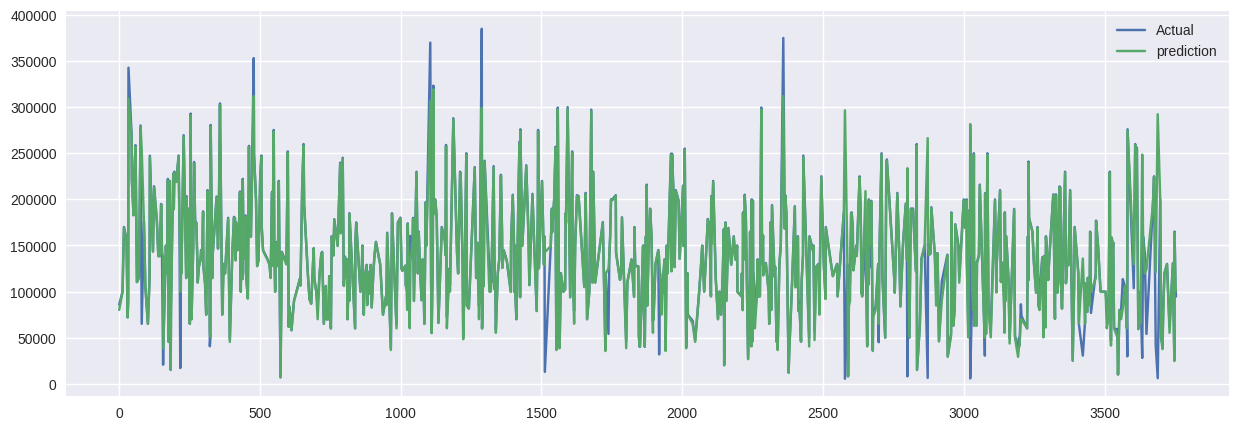

In [29]:
df_final=pd.DataFrame({'Y_test':y_test,'prediction':prediction})

df_final=df_final.sort_index()

plt.figure(figsize=(15,5))
plt.plot(df_final)
plt.legend(['Actual','prediction'])